In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


# Fashion MNIST Dataset

In [3]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [4]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4365 - accuracy: 0.8418
Epoch 2/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2922 - accuracy: 0.8925
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2462 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2141 - accuracy: 0.9198
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1876 - accuracy: 0.9297


In [8]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2483 - accuracy: 0.9097


In [9]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


# Vizualise Layers -> Conv & Pooling

In [14]:
FIRST_IMAGE=0
SECOND_IMAGE=28
THIRD_IMAGE=23
CONVOLUTION_NUMBER = 1

In [12]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

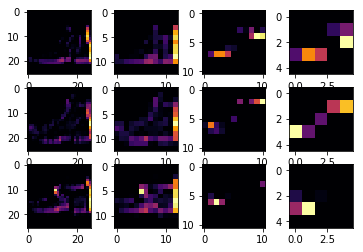

In [15]:
f, axarr = plt.subplots(3,4);

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)